### 随机森林和extra-trees

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_regression

In [2]:
X,y,coef=make_regression(n_samples=1000, n_features=1,noise=20,coef=True)

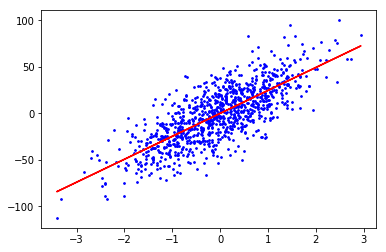

In [3]:
plt.scatter(X,y,c='b',s=3)
plt.plot(X, X*coef,c='r')
plt.show()

### random_forrests

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 500,random_state=666, oob_score=True)
rf_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=True, random_state=666, verbose=0, warm_start=False)

In [9]:
rf_clf.oob_score_

0.892

In [10]:
rf_clf2 = RandomForestClassifier(n_estimators = 500,random_state=666, max_leaf_nodes = 16,oob_score=True)
rf_clf2.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=True, random_state=666, verbose=0, warm_start=False)

In [11]:
rf_clf2.oob_score_

0.906

### 使用Extra-trees

In [13]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(random_state=666,n_estimators = 500, bootstrap = True, oob_score=True)

## Gradient Boosting

In [4]:
# Create a random dataset 
rng = np.random.RandomState(1) 
X = np.sort(10 * rng.rand(160, 1), axis=0) 
y = np.sin(X).ravel() 
y[::5] += 2 * (0.5 - rng.rand(32)) # 每五个点增加一次噪音

0 th boosting


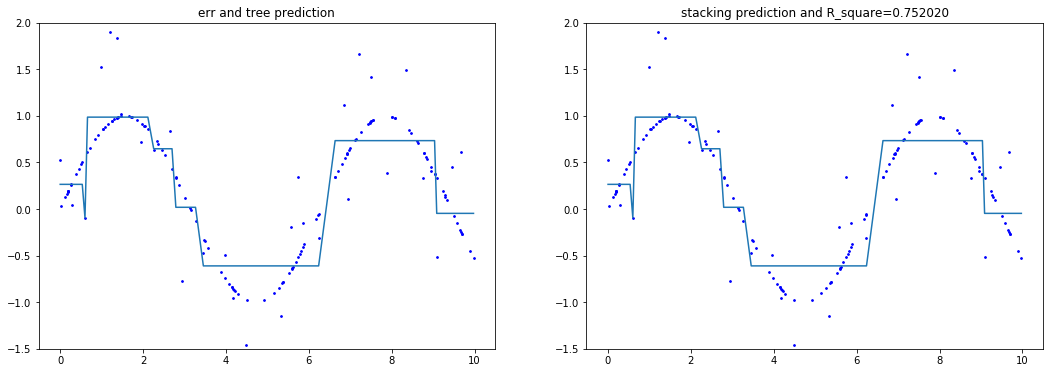

1 th boosting


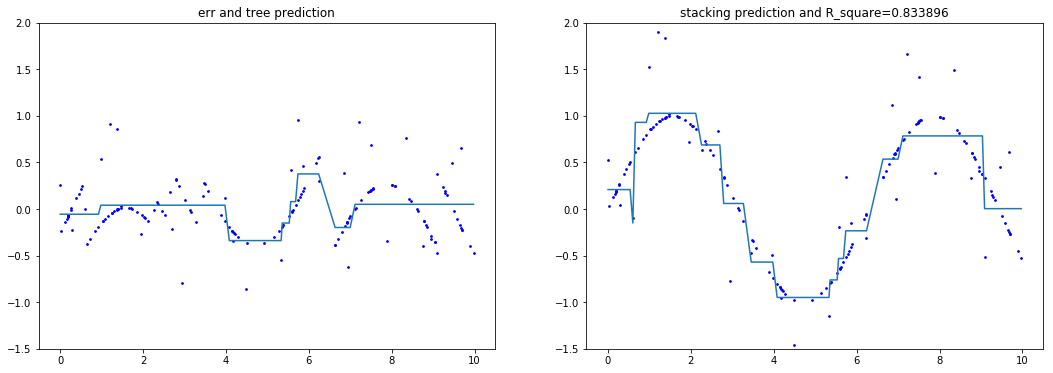

2 th boosting


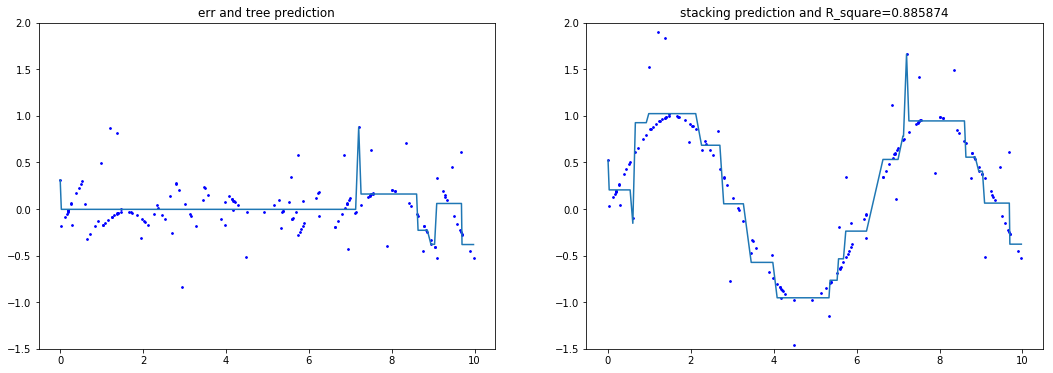

3 th boosting


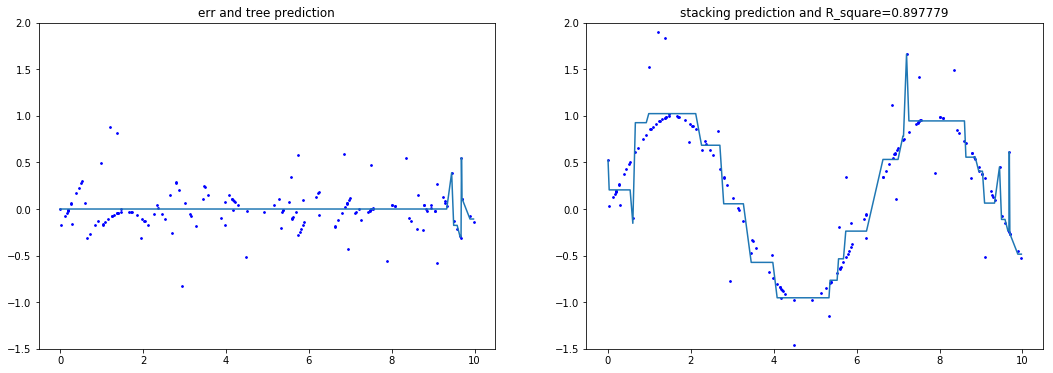

4 th boosting


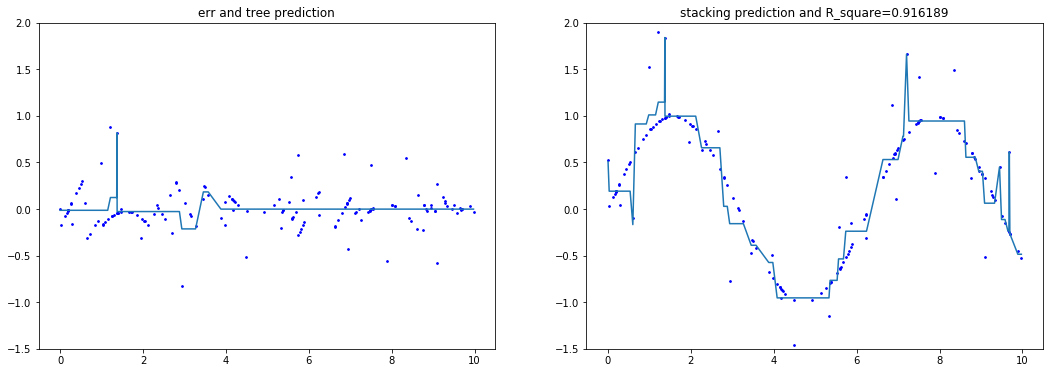

5 th boosting


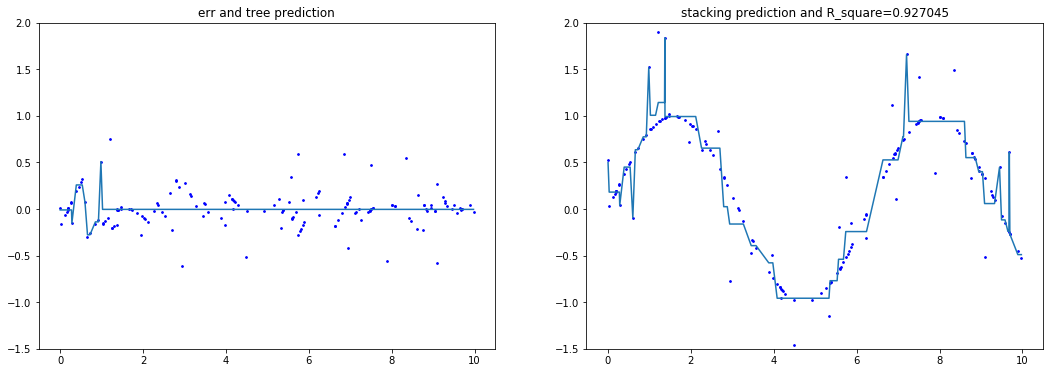

6 th boosting


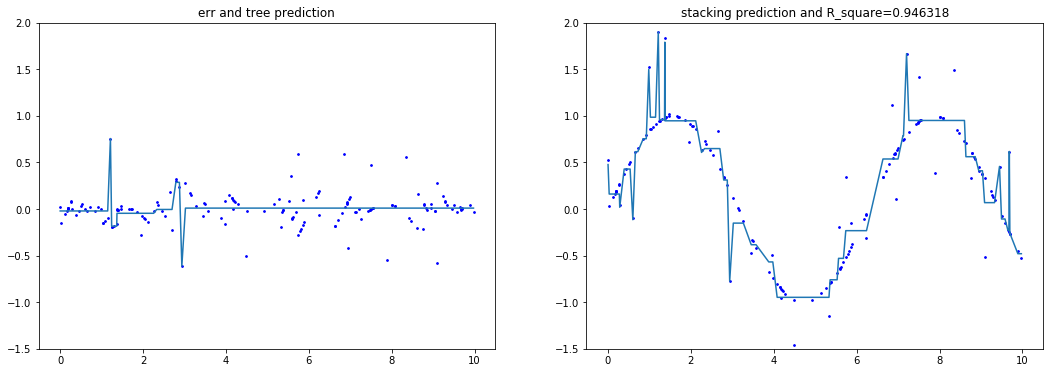

7 th boosting


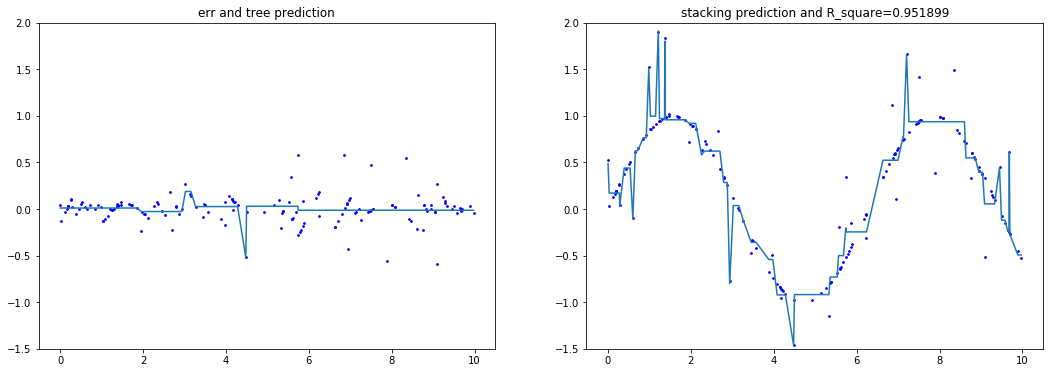

8 th boosting


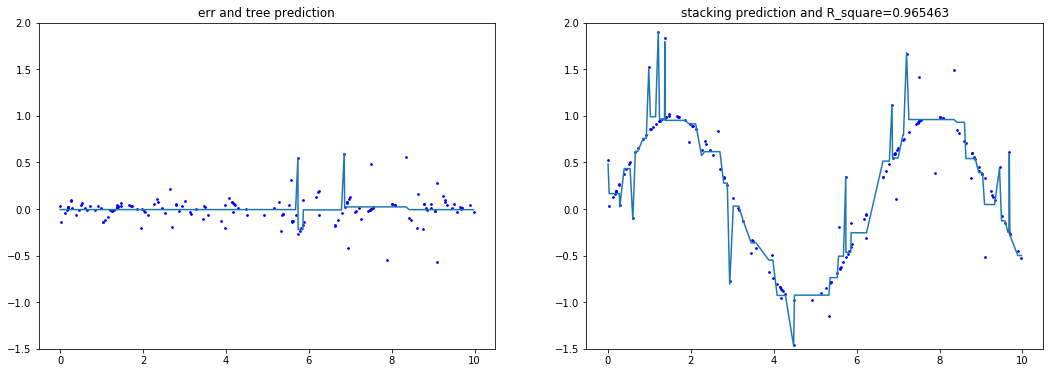

9 th boosting


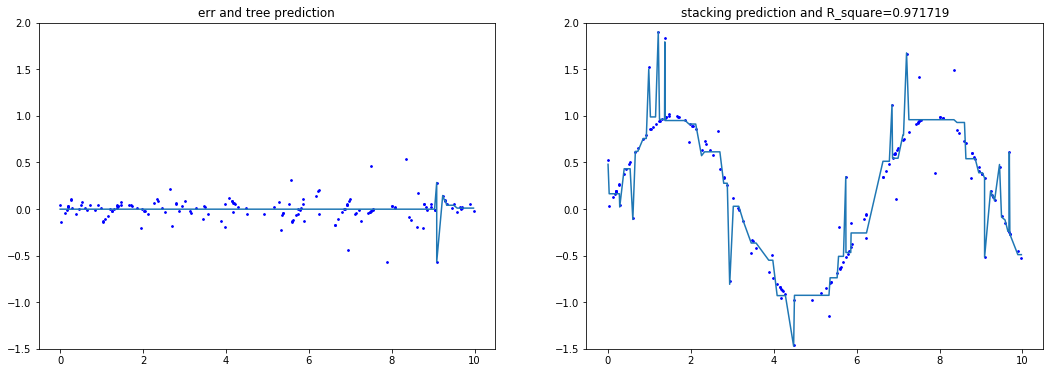

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO 
import pydotplus
treeReg = [DecisionTreeRegressor(max_depth=3)] * 10
y_err=[y]
predicted=[]
from playML.metrics import r2_score
nums = [121,122]
for i in range(len(treeReg)):
    fig = plt.figure(figsize=(18,6))
    treeReg[i].fit(X, y_err[i])
    #Predict Output
    predicted.append(treeReg[i].predict(X))
    # err plot
    ax = fig.add_subplot(nums[0])
    ax.plot(X, predicted[i])
    y_err.append(y_err[i] - predicted[i])
    ax.scatter(X, y_err[i],c='b',s=3)
    ax.set_title("err and tree prediction")
    ax.set_ylim(-1.5, 2)
    # 集成predict
    ax = fig.add_subplot(nums[1])
    y_predict = sum(predicted)
    ax.plot(X, y_predict)
    ax.scatter(X, y,c='b',s=3)
    ax.set_ylim(-1.5, 2)
    R_square = r2_score(y_predict, y)
    ax.set_title("stacking prediction and R_square=%f"%R_square)
    print("%i th boosting"%i)
    plt.show()

## GBRT集成

In [63]:
from playML.metrics import mean_squared_error
from playML.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = GradientBoostingRegressor(max_depth=2, n_estimators=120)
clf.fit(X_train, y_train)
n = [i for i in range(1,121)]
errs = [mean_squared_error(y_test, y_pred) for y_pred in clf.staged_predict(X_test)]
bst_N_esti = np.argmin(errs)

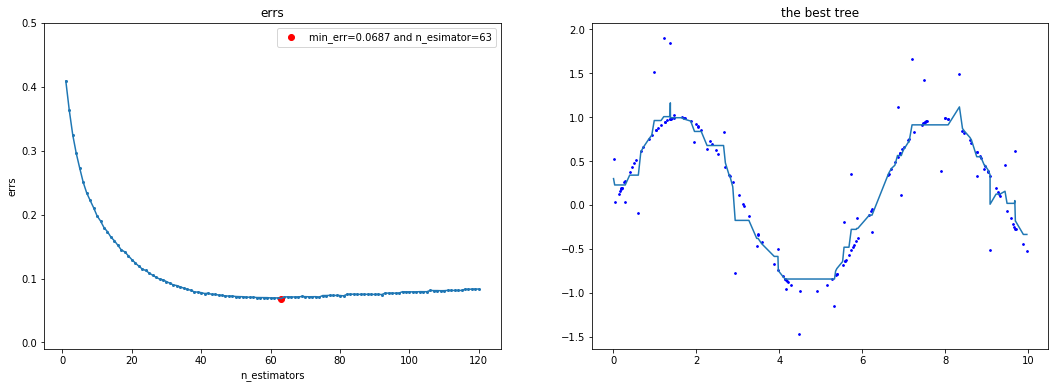

In [91]:
bst_N_esti
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(121)
ax.plot(n, errs)
ax.set_ylim(-0.01,0.5)
ax.set_ylabel("errs")
ax.set_xlabel("n_estimators")
ax.set_title("errs")
ax.scatter(n, errs,s=4)
ax.scatter( bst_N_esti+1,errs[bst_N_esti], c="red",label="min_err=0.0687 and n_esimator=63")
plt.legend()
ax = fig.add_subplot(122)
clf_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_N_esti)
clf_best.fit(X, y)
ax.plot(X, clf_best.predict(X))
ax.scatter(X, y, color="b",s=3)
ax.set_title("the best tree")
plt.show()

In [ ]:
from IPython.display import Image
dot_data = StringIO() 

tree.export_graphviz(clf, out_file=dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())